# Validation of the SPS30 low cost particulate matter sensor


## Purpose
adfasdfasfasdfad

## Methodology
asdfasdfasdfasdfasdf


## Results
 - res
 - res

## Suggested next steps
 - res

# Setup

## Library import
We import all the required Python libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# cf.set_config_file(theme='white')

import matplotlib.pyplot as plt
import seaborn as sns


## Local library import
We import all the required local libraries libraries

In [3]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [4]:
RAW_PATH = "raw/"


# Data import
We retrieve all the required data for the analysis.

## Import SPS data  

It was found a difference betwen the arduino and OPS (UTC) clock for files older than 2021-06-09 18:00:   
2021-06-09T17:00:37 - SPS - arduino  
2021-06-09T17:02:24 - UTC.  

The solution:  
add the timedelta to the arduino readings

In [5]:
sps_raw = pd.read_csv(RAW_PATH+"SPS30_2021-06-11.CSV")
sps_raw['datetime'] = pd.to_datetime(sps_raw['datetime']) ## UTC time
#sps_raw['datetime'] = sps_raw['datetime']+delta
sps_raw.head()

,datetime,temperature,pressure,humidity,CO2,CO,O3,partsize,massPM1,massPM2,massPM4,massPM10,numPM1,numPM2,numPM4,numPM10
0,2021-06-09 16:32:30,24.05,942.92,40.73,756.00,5.50,0.2098,0.8135,2.1781,3.0001,3.5641,3.6768,16.4676,17.3381,17.5095,17.5355
1,2021-06-09 16:32:43,24.04,942.92,40.98,756.99,5.09,0.1932,0.7769,2.0988,2.7761,3.2266,3.3167,16.0118,16.7143,16.8524,16.8738
2,2021-06-09 16:32:55,24.03,942.94,41.16,757.99,5.31,0.2267,0.7400,2.0615,2.6098,2.9577,3.0273,15.8733,16.4247,16.5327,16.5501
3,2021-06-09 16:33:08,24.02,942.92,41.09,757.01,5.06,0.1775,0.7276,2.1481,2.6750,3.0016,3.0669,16.5956,17.1175,17.2196,17.2363
4,2021-06-09 16:33:20,24.01,942.92,40.92,756.01,5.34,0.2018,0.7098,2.3636,2.8940,3.2133,3.2772,18.3219,18.8375,18.9382,18.9550


Select only the necessary data (mass, nums and partsize)

In [6]:
sps_raw = sps_raw.drop(['temperature','pressure','humidity','CO2','CO','O3'],axis=1)

In [7]:
sps_raw.head()

,datetime,partsize,massPM1,massPM2,massPM4,massPM10,numPM1,numPM2,numPM4,numPM10
0,2021-06-09 16:32:30,0.8135,2.1781,3.0001,3.5641,3.6768,16.4676,17.3381,17.5095,17.5355
1,2021-06-09 16:32:43,0.7769,2.0988,2.7761,3.2266,3.3167,16.0118,16.7143,16.8524,16.8738
2,2021-06-09 16:32:55,0.7400,2.0615,2.6098,2.9577,3.0273,15.8733,16.4247,16.5327,16.5501
3,2021-06-09 16:33:08,0.7276,2.1481,2.6750,3.0016,3.0669,16.5956,17.1175,17.2196,17.2363
4,2021-06-09 16:33:20,0.7098,2.3636,2.8940,3.2133,3.2772,18.3219,18.8375,18.9382,18.9550


## Import OPS data 

In [8]:
ops_raw_num = pd.read_excel(RAW_PATH+'OPS_2021-06-11.xlsx',engine='openpyxl',sheet_name='Number')
ops_raw_num['datetime'] = pd.to_datetime(ops_raw_num['datetime'])

In [9]:
ops_raw_num.head()

,Sample,datetime,Date,Start Time,0.3-0.5,0.5-1.0,1.0-2.5,2.5-4,4.0-10.0
0,1,2021-06-09 19:30:00,2021-06-09,19:30:00,23.1688,1.37207,0.330982,0.120357,0.096286
1,2,2021-06-09 19:30:10,2021-06-09,19:30:10,22.4826,1.41419,0.481426,0.138410,0.138410
2,3,2021-06-09 19:30:20,2021-06-09,19:30:20,23.7193,1.43242,0.457413,0.132409,0.066204
3,4,2021-06-09 19:30:30,2021-06-09,19:30:30,23.1399,1.38418,0.373127,0.180545,0.102309
4,5,2021-06-09 19:30:40,2021-06-09,19:30:40,23.3745,1.40825,0.391180,0.156472,0.096290


# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

## Preparing SPS data

In [10]:
sps_num = pd.DataFrame()
sps_num['datetime'] = sps_raw['datetime']
sps_num["PM10"] = sps_raw['numPM10']
sps_num["PM4"] = sps_raw['numPM4']
sps_num["PM2"] = sps_raw['numPM2']
sps_num["PM1"] = sps_raw['numPM1']

In [11]:
sps_num.head()

,datetime,PM10,PM4,PM2,PM1
0,2021-06-09 16:32:30,17.5355,17.5095,17.3381,16.4676
1,2021-06-09 16:32:43,16.8738,16.8524,16.7143,16.0118
2,2021-06-09 16:32:55,16.5501,16.5327,16.4247,15.8733
3,2021-06-09 16:33:08,17.2363,17.2196,17.1175,16.5956
4,2021-06-09 16:33:20,18.9550,18.9382,18.8375,18.3219


## Prepare OPS data 

In order to get PM10, PM4, PM2 and PM1 is necessary to do calculation:  
PM10 is the sum of all columns = 0.3-0.5 + 0.5-1.0 + 1.0-2.5+ 2.5-4.0 + 4.0_10.0  
PM4 is the sum of all the others until 2.5-4.0  
the same applies to the other values

In [12]:
ops_num = pd.DataFrame()

In [13]:
ops_num['PM10'] = ops_raw_num['0.3-0.5']+ops_raw_num['0.5-1.0']+ops_raw_num['1.0-2.5']+ops_raw_num['2.5-4']+ops_raw_num['4.0-10.0']
ops_num['PM4'] = ops_raw_num['0.3-0.5']+ops_raw_num['0.5-1.0']+ops_raw_num['1.0-2.5']+ops_raw_num['2.5-4']
ops_num['PM2'] = ops_raw_num['0.3-0.5']+ops_raw_num['0.5-1.0']+ops_raw_num['1.0-2.5']
ops_num['PM1'] = ops_raw_num['0.3-0.5']+ops_raw_num['0.5-1.0']
ops_num['datetime'] = ops_raw_num['datetime']
ops_num.head()

,PM10,PM4,PM2,PM1,datetime
0,25.088495,24.992209,24.871852,24.54087,2021-06-09 19:30:00
1,24.655036,24.516626,24.378216,23.89679,2021-06-09 19:30:10
2,25.807747,25.741542,25.609133,25.15172,2021-06-09 19:30:20
3,25.180061,25.077752,24.897207,24.52408,2021-06-09 19:30:30
4,25.426692,25.330402,25.173930,24.78275,2021-06-09 19:30:40


## Joining data

The linear model has to correlate the 1 minute average of the readings of the SPS and OPS.  
Therefore, a resample is needed with an agg. function of mean() both for SPS and OPS.  
Later it is possible to join both readings

### Number concentration

Resample the SPS data with 1 minute interval with average aggregation function

In [14]:
df1 = sps_num.set_index('datetime').resample('1T').mean().rename({'PM10':'spsPM10','PM4':'spsPM4','PM2':'spsPM2','PM1':'spsPM1',},axis=1)

In [15]:
df2 = ops_num.set_index('datetime').resample('1T').mean().rename({'PM10':'opsPM10','PM4':'opsPM4','PM2':'opsPM2','PM1':'opsPM1',},axis=1)

Concatenate based on the timeseries index and drop the non-matched measurements

In [16]:
num = pd.concat([df1,df2],axis=1,join='outer').dropna()

In [17]:
num.head()

,spsPM10,spsPM4,spsPM2,spsPM1,opsPM10,opsPM4,opsPM2,opsPM1
datetime,,,,,,,,
2021-06-09 19:30:00,23.274500,23.269183,23.259400,23.198667,25.143418,25.046127,24.903700,24.514532
2021-06-09 19:31:00,24.795720,24.790100,24.780140,24.717720,25.103366,25.021120,24.879696,24.425330
2021-06-09 19:32:00,22.829767,22.824617,22.815383,22.757767,24.741989,24.656738,24.527356,24.136203
2021-06-09 19:33:00,23.252283,23.246950,23.237233,23.176733,24.897276,24.819042,24.678624,24.252352
2021-06-09 19:34:00,22.881533,22.876083,22.865083,22.798433,24.943522,24.864285,24.737908,24.310632


# Data comparision

In [18]:
from sklearn.metrics import r2_score,mean_squared_error,max_error

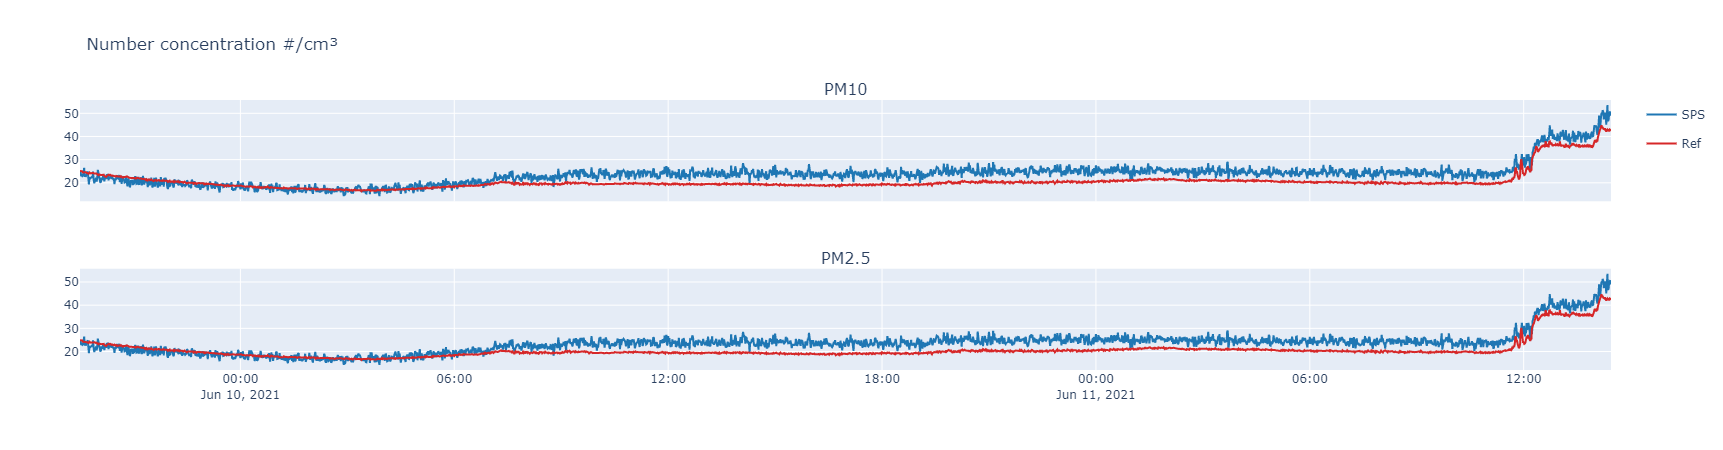

In [19]:
fig = make_subplots(rows=2,cols=1,shared_xaxes=True,subplot_titles=('PM10','PM2.5'))
PM10_COLOR = '#1f77b4'
PM2_COLOR = '#d62728'
fig.add_trace(go.Scatter(x=num.index,y=num['spsPM10'],name='SPS',legendgroup='group1',line_color=PM10_COLOR),row=1,col=1)
fig.add_trace(go.Scatter(x=num.index,y=num['opsPM10'],name='Ref',legendgroup='group2',line_color=PM2_COLOR),row=1,col=1)


fig.add_trace(go.Scatter(x=num.index,y=num['spsPM2'],name='SPS',legendgroup='group1',line_color=PM10_COLOR,showlegend=False),row=2,col=1)
fig.add_trace(go.Scatter(x=num.index,y=num['opsPM2'],name='Ref',legendgroup='group2',line_color=PM2_COLOR,showlegend=False),row=2,col=1)



fig.update_layout(title='Number concentration #/cm³')
fig.show()

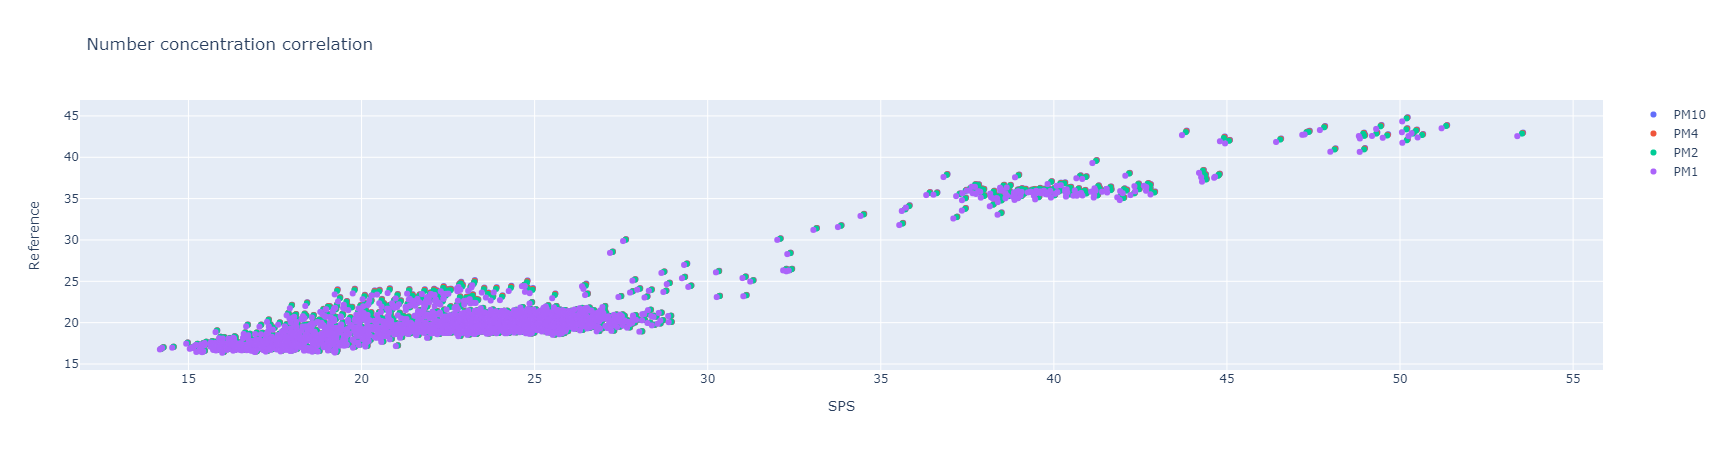

In [20]:
fig = make_subplots(rows=1,cols=1,shared_xaxes=True)
PM10_COLOR = '#1f77b4'
PM2_COLOR = '#d62728'
fig.add_trace(go.Scatter(x=num['spsPM10'],y=num['opsPM10'],mode='markers',showlegend=True,name='PM10'),row=1,col=1)
fig.add_trace(go.Scatter(x=num['spsPM4'],y=num['opsPM4'],mode='markers',showlegend=True,name='PM4'),row=1,col=1)
fig.add_trace(go.Scatter(x=num['spsPM2'],y=num['opsPM2'],mode='markers',showlegend=True,name='PM2'),row=1,col=1)
fig.add_trace(go.Scatter(x=num['spsPM1'],y=num['opsPM1'],mode='markers',showlegend=True,name='PM1'),row=1,col=1)



fig.update_layout(title='Number concentration correlation')
fig.update_xaxes(title_text='SPS')
fig.update_yaxes(title_text='Reference')
fig.update_layout(width=700,height=450)
fig.show()

<BarContainer object of 4 artists>

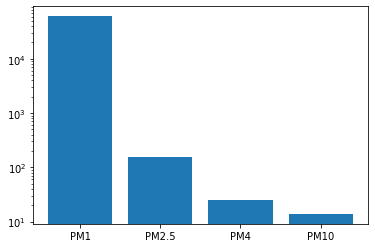

In [185]:
bins = [num.spsPM1.sum(),num.spsPM2.sum()-num.spsPM1.sum(),num.spsPM4.sum()-num.spsPM2.sum(),num.spsPM10.sum()-num.spsPM4.sum()]
plt.bar(['PM1','PM2.5','PM4','PM10'],bins,log=True)

In [21]:
print(f'PM10 r2:{r2_score(num.opsPM10,num.spsPM10):.4f}')
print(f'PM4 r2:{r2_score(num.opsPM4,num.spsPM4):.4f}')
print(f'PM2.5 r2:{r2_score(num.opsPM2,num.spsPM2):.4f}')
print(f'PM1 r2:{r2_score(num.opsPM1,num.spsPM1):.4f}')

PM10 r2:0.1319
PM4 r2:0.1291
PM2.5 r2:0.1237
PM1 r2:0.1085


# Model adjustment 

In [157]:
from scipy.optimize import curve_fit

In [158]:
def lm(x,a,b):
    return a*x+b

In [159]:
cutoff = 30
q1 = num['spsPM10']<=cutoff
q2 = num['spsPM10']>cutoff

In [160]:
xdata = num.spsPM10.loc[q1]
ydata = num.opsPM10.loc[q1]
lm1,pcov = curve_fit(lm,xdata,ydata)

xdata = num.spsPM10.loc[q2]
ydata = num.opsPM10.loc[q2]
lm2,pcov = curve_fit(lm,xdata,ydata)

In [161]:
a,b = lm1
print(f'a: {a}')
print(f'b: {b}')
ytrue = num.opsPM10.loc[q1]
ypred = lm(num.spsPM10.loc[q1],a,b)
print(f'r2: {r2_score(ytrue,ypred)}')

a: 0.2766514673265933
b: 13.463292978134291
r2: 0.32777947663910134


In [162]:
a,b = lm2
print(f'a: {a}')
print(f'b: {b}')
ytrue = num.opsPM10.loc[q2]
ypred = lm(num.spsPM10.loc[q2],a,b)
print(f'r2: {r2_score(ytrue,ypred)}')

a: 0.7801625139807596
b: 4.736203417681246
r2: 0.8253622172308657


In [163]:
def model(x):
    if x<=cutoff:
        return lm1[0]*x+lm1[1]
    else:
        return lm2[0]*x+lm2[1]

In [164]:
num['adjPM10']=num.spsPM10.apply(model)

In [165]:
print('Total R2 of the Bi-linear model')
print(r2_score(num.opsPM10,num.adjPM10))

Total R2 of the Bi-linear model
0.916529137851526


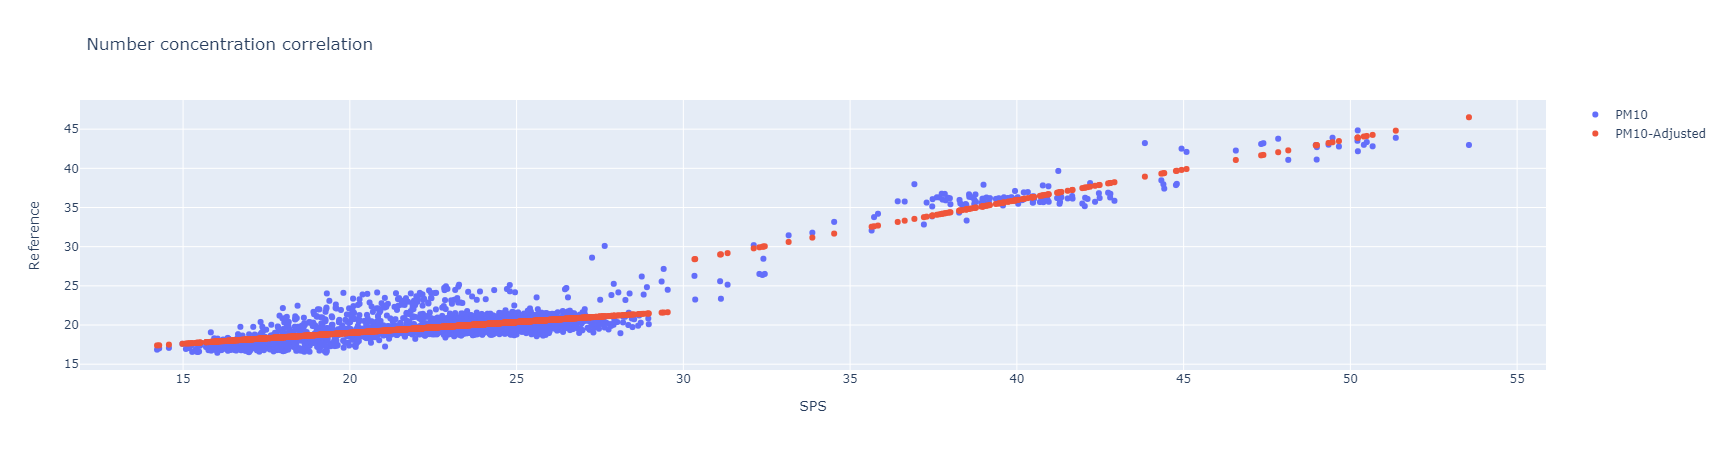

In [166]:
fig = make_subplots(rows=1,cols=1,shared_xaxes=True)
PM10_COLOR = '#1f77b4'
PM2_COLOR = '#d62728'
fig.add_trace(go.Scatter(x=num['spsPM10'],y=num['opsPM10'],mode='markers',showlegend=True,name='PM10'),row=1,col=1)
# fig.add_trace(go.Scatter(x=num.spsPM10.loc[q1],y=lm(num.spsPM10.loc[q1],lm1[0],lm1[1]),mode='markers',showlegend=True,name='PM10-Adjusted'),row=1,col=1)
# fig.add_trace(go.Scatter(x=num.spsPM10.loc[q2],y=lm(num.spsPM10.loc[q2],lm2[0],lm2[1]),mode='markers',showlegend=True,name='PM10-Adjusted'),row=1,col=1)
fig.add_trace(go.Scatter(x=num.spsPM10,y=num.adjPM10,mode='markers',showlegend=True,name='PM10-Adjusted'),row=1,col=1)


fig.update_layout(title='Number concentration correlation')
fig.update_xaxes(title_text='SPS')
fig.update_yaxes(title_text='Reference')
fig.update_layout(width=700,height=450)
fig.show()

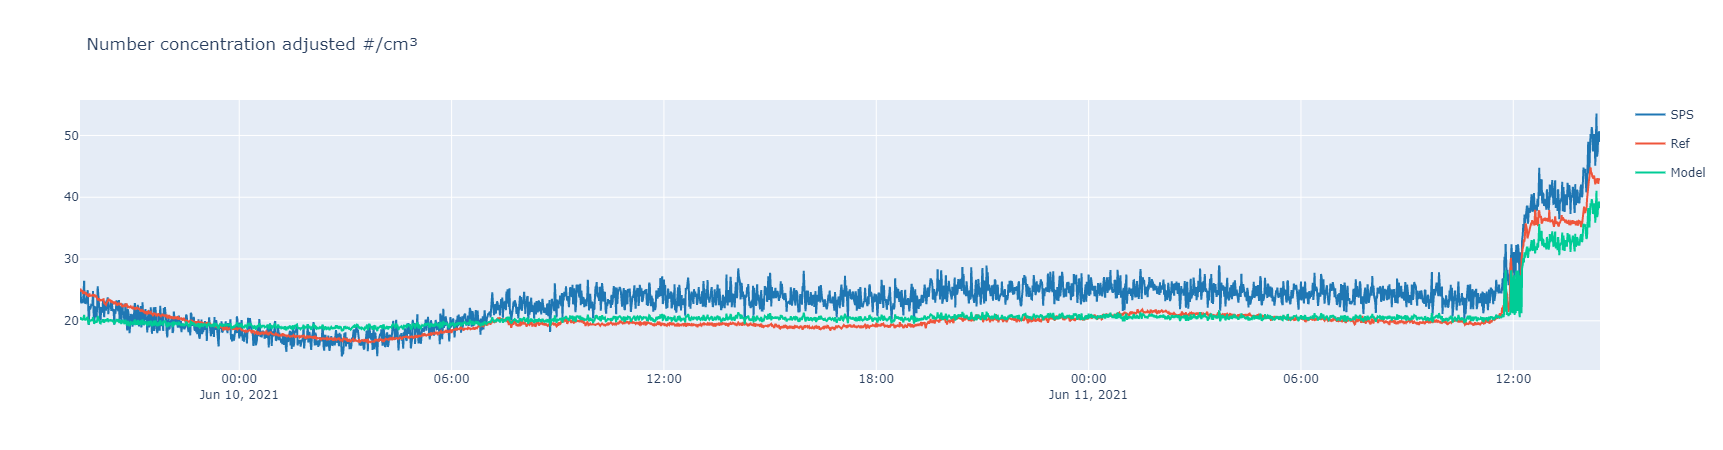

In [168]:
fig = make_subplots(rows=1,cols=1,shared_xaxes=True)
PM10_COLOR = '#1f77b4'
PM2_COLOR = '#d62728'
fig.add_trace(go.Scatter(x=num.index,y=num['spsPM10'],name='SPS',legendgroup='group1',line_color=PM10_COLOR),row=1,col=1)
fig.add_trace(go.Scatter(x=num.index,y=num['opsPM10'],name='Ref'),row=1,col=1)
fig.add_trace(go.Scatter(x=num.index,y=lm(num['adjPM10'],a,b),name='Model'),row=1,col=1)


fig.update_layout(title='Number concentration adjusted #/cm³')
fig.show()